https://projecteuler.net/problem=213

In [1]:
import random
from statistics import mean, stdev

import numpy as np
import matplotlib.pyplot as plt


N = 30


def neighbs(i: int, j: int) -> list[tuple[int, int]]:
    return [
        pos
        for pos in ((i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1))
        if 0 <= pos[0] < N and 0 <= pos[1] < N
    ]


def ring(grid: np.ndarray) -> np.ndarray:
    new_grid = np.zeros_like(grid)
    for i in range(N):
        for j in range(N):
            for _ in range(grid[i, j]):
                pt = random.choice(neighbs(i, j))
                new_grid[pt[0], pt[1]] += 1
    return new_grid


def ring_n_times(n: int) -> np.ndarray:
    grid = np.ones((N, N), dtype=int)
    for _ in range(n):
        grid = ring(grid)
    return grid


def simulate_one() -> int:
    return int(np.sum(ring_n_times(50) == 0))


def simulate_many(n: int) -> tuple[float, float]:
    sims = [simulate_one() for _ in range(n)]
    return mean(sims), stdev(sims)

In [2]:
mean_, std_ = simulate_many(1_000)
mean_, std_

(331.026, 9.120444424835146)

In [3]:
grids = [np.ones((N, N), dtype=int)]
for _ in range(10_000):
    grids.append(ring(grids[-1]))

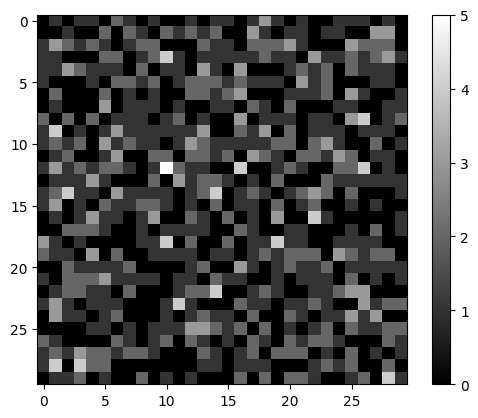

In [4]:
plt.imshow(grids[50], cmap='grey')
plt.colorbar()
plt.show()

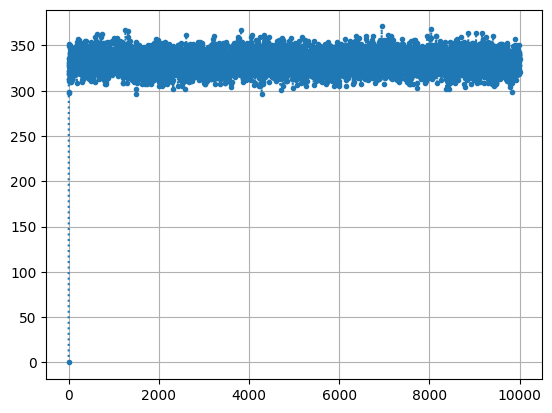

In [5]:
num_empty_squares = [np.sum(gr == 0) for gr in grids]

plt.plot(num_empty_squares, ':.')
plt.grid()
plt.show()

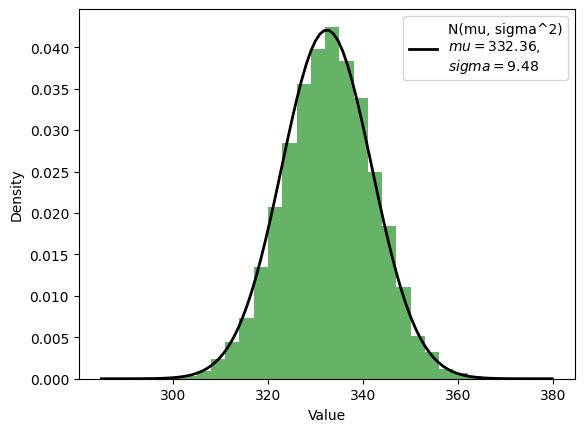

In [6]:
from scipy import stats

num_empty_squares_after_burn_in = np.array(num_empty_squares[3:])

mn, std = stats.norm.fit(num_empty_squares_after_burn_in)

# Create a range of values for plotting the fitted distribution
xmin, xmax = mn - 5 * std, mn + 5 * std
x = np.linspace(xmin, xmax, 100)

# Plot the histogram of the samples
plt.hist(num_empty_squares_after_burn_in, bins=25, density=True, alpha=0.6, color='g')

# Plot the fitted normal distribution
pdf = stats.norm.pdf(x, mn, std)
plt.plot(x, pdf, 'k', linewidth=2, label=f'N(mu, sigma^2)\n$mu={mn:.2f}$,\n$sigma={std:.2f}$')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


## Solution

In [8]:
def diffuse_probabilities(i_start, j_start, n_steps: int) -> list[np.ndarray]:
    prob_grid = np.zeros((N, N))
    prob_grid[i_start, j_start] = 1.0
    prob_grids = [prob_grid]
    for _ in range(n_steps):
        next_prob_grid = np.zeros_like(prob_grids[-1])
        for i in range(N):
            for j in range(N):
                neighbours = neighbs(i, j)
                p_split = prob_grids[-1][i, j] / len(neighbours)
                for nei in neighbours:
                    next_prob_grid[nei[0], nei[1]] += p_split
        prob_grids.append(next_prob_grid)
    return prob_grids


In [ ]:
all_prob_grids = np.array([diffuse_probabilities(i_start, j_start, 50)[-1] for i_start in range(N) for j_start in range(N)])

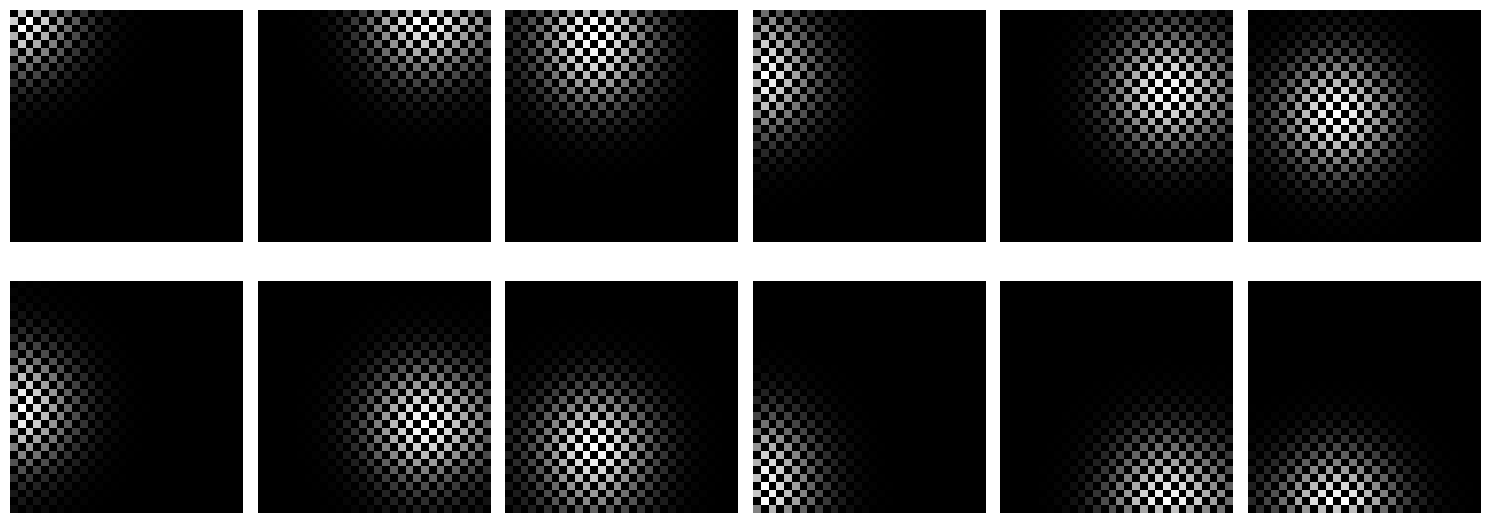

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 6, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(all_prob_grids[1 + 80 * i], cmap="grey", interpolation="none")
    ax.axis("off")

plt.tight_layout()

plt.show()


In [ ]:
prob_no_flea_per_cell = np.prod(1 - all_prob_grids, axis=0)

In [53]:
round(prob_no_flea_per_cell.sum(), 6)

330.721154